In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [3]:
df_train = laod_data('bookmark_train_data.csv')
print(len(df_train))
#df_train.head(3)

199


In [4]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df_train['category'])

WORD_CLASSE_LABELS = ['その他', 'フィラー', '副詞', '助動詞', '助詞',
                     '動詞', '名詞', '形容詞', '感動詞', '接続詞',
                     '接頭詞', '記号', '連体詞',]
new_wc_columns = {}
for (i, name) in enumerate(WORD_CLASSE_LABELS):
    new_wc_columns['wc_sum_{}'.format(name)] = 'wc_sum_{}'.format(i)
    new_wc_columns['wc_rate_{}'.format(name)] = 'wc_rate_{}'.format(i)


def data_preprocess(df):
    new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)

    new_df['category'] = cat_le.transform(new_df['category'])

    new_df['rating'] = new_df['rating'] * 10
    new_df = new_df.astype({'rating': 'int32'})

    #wc_columns = [col for col in new_df.columns if col.find('wc_') != -1]
    #new_df = new_df.drop(wc_columns, axis=1)
    new_df = new_df.rename(columns=new_wc_columns)

    kw_columns = [col for col in new_df.columns if col.find('kw_') != -1]
    new_df = new_df.drop(kw_columns, axis=1)

    return new_df

In [5]:
df_train.keys()

Index(['ncode', 'title', 'category', 'bookmark_cat', 'created_at',
       'updated_at', 'char_count_sum', 'new_line_count_sum',
       'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_その他', 'wc_sum_フィラー', 'wc_sum_副詞',
       'wc_sum_助動詞', 'wc_sum_助詞', 'wc_sum_動詞', 'wc_sum_名詞', 'wc_sum_形容詞',
       'wc_sum_感動詞', 'wc_sum_接続詞', 'wc_sum_接頭詞', 'wc_sum_記号', 'wc_sum_連体詞',
       'wc_rate_その他', 'wc_rate_フィラー', 'wc_rate_副詞', 'wc_rate_助動詞',
       'wc_rate_助詞', 'wc_rate_動詞', 'wc_rate_名詞', 'wc_rate_形容詞', 'wc_rate_感動詞',
       'wc_rate_接続詞', 'wc_rate_接頭詞', 'wc_rate_記号', 'wc_rate_連体詞', 'kw_冒険者',
       'kw_魔王', 'kw_日常', 'kw_成り上がり', 'kw_内政', 'kw_恋愛', 'kw_無双', 'kw_青春',
       'kw_ハーレム', 'kw_男主人公', 'kw_奴隷', 'kw_テンプレ', 'kw_勘違い', 'kw_ほのぼの', 'kw_貴族',
       'kw_ギルド', 'kw_コメディ', 'kw_異世界', 'kw_エルフ', 'kw_ファンタジー', 'kw_オリジナル戦記',
       

In [6]:
df_train2 = data_preprocess(df_train)

In [7]:
df_train2.keys()

Index(['category', 'created_at', 'updated_at', 'char_count_sum',
       'new_line_count_sum', 'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_0', 'wc_sum_1', 'wc_sum_2',
       'wc_sum_3', 'wc_sum_4', 'wc_sum_5', 'wc_sum_6', 'wc_sum_7', 'wc_sum_8',
       'wc_sum_9', 'wc_sum_10', 'wc_sum_11', 'wc_sum_12', 'wc_rate_0',
       'wc_rate_1', 'wc_rate_2', 'wc_rate_3', 'wc_rate_4', 'wc_rate_5',
       'wc_rate_6', 'wc_rate_7', 'wc_rate_8', 'wc_rate_9', 'wc_rate_10',
       'wc_rate_11', 'wc_rate_12', 'rating'],
      dtype='object')

In [8]:
df_train2.head(3)

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,128.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,138.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,103.0,...,0.240486,0.177328,0.285020,0.014575,0.000000,0.005668,0.008907,0.148178,0.005668,30


In [9]:
X = df_train2.drop(['rating'], axis=1).values
t = df_train2['rating'].values
print(X.shape, t.shape)

(199, 39) (199,)


In [10]:
feature_names = df_train2.keys()[:-1]

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler(random_state=0)
X_resampled, t_resampled = ros.fit_resample(X, t)

print(X_resampled.shape, t_resampled.shape)

u, counts = np.unique(t_resampled, return_counts=True)

print(len(u))
print(u)
print(counts)

(915, 39) (915,)
15
[ 5 10 15 17 20 25 30 35 40 45 50 52 60 67 75]
[61 61 61 61 61 61 61 61 61 61 61 61 61 61 61]


In [13]:
from sklearn.model_selection import train_test_split

#X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, shuffle=True, random_state=1)
X_train, X_val, t_train, t_val = train_test_split(X_resampled, t_resampled, test_size=0.3, shuffle=True, random_state=1)

In [14]:
print(X_train.shape, t_train.shape)
print(X_val.shape, t_val.shape)

(640, 39) (640,)
(275, 39) (275,)


In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
import os
import random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

reset_seed()

In [18]:
from tensorflow.keras import models, layers

In [29]:
model = models.Sequential()

model.add(layers.Dense(5, activation='relu', input_shape=(len(feature_names),)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

optimizer = keras.optimizers.SGD(0.01)

model.compile(loss='mean_squared_error', optimizer=optimizer)

In [31]:
history = model.fit(X_train, t_train,
                    batch_size=10,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_val, t_val))

Epoch 1/50
64/64 [==============================] - 0s 1ms/step - loss: 358.4040 - val_loss: 360.3793
Epoch 2/50
64/64 [==============================] - 0s 867us/step - loss: 382.7191 - val_loss: 749.8055
Epoch 3/50
64/64 [==============================] - 0s 859us/step - loss: 355.1043 - val_loss: 548.5541
Epoch 4/50
64/64 [==============================] - 0s 864us/step - loss: 351.0534 - val_loss: 893.4874
Epoch 5/50
64/64 [==============================] - 0s 924us/step - loss: 358.7045 - val_loss: 532.9385
Epoch 6/50
64/64 [==============================] - 0s 830us/step - loss: 357.6245 - val_loss: 505.3749
Epoch 7/50
64/64 [==============================] - 0s 832us/step - loss: 360.5677 - val_loss: 620.0396
Epoch 8/50
64/64 [==============================] - 0s 832us/step - loss: 356.1456 - val_loss: 745.9106
Epoch 9/50
64/64 [==============================] - 0s 839us/step - loss: 358.5794 - val_loss: 393.7520
Epoch 10/50
64/64 [==============================] - 0s 830us/step

In [32]:
results = pd.DataFrame(history.history)

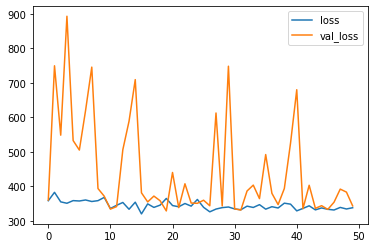

In [33]:
results[['loss', 'val_loss']].plot()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [36]:
X_train2 = scaler.transform(X_train)
X_val2 = scaler.transform(X_val)

In [37]:
df_train3 = pd.DataFrame(X_train2, columns=feature_names)

In [38]:
df_train3.head()

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,...,wc_rate_3,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12
0,1.160369,-1.367588,-0.432053,-0.422828,-0.489004,-0.529102,-0.502003,-0.580050,-0.422828,-0.489004,...,-0.712245,1.507450,-0.758197,0.617993,-0.101028,-0.819915,-0.192466,2.331197,-0.843197,0.562996
1,-0.176510,-0.833919,0.463493,0.209341,-0.246186,0.850963,-1.162828,1.329486,0.209341,-0.246186,...,1.410629,0.751336,0.915122,-0.043664,-0.739917,-0.895645,-1.287587,-0.056767,-1.059586,-1.445686
2,-0.176510,0.306020,0.081194,-0.182052,0.077571,0.224446,0.831539,0.880237,-0.182052,0.077571,...,-0.910284,-0.282924,-1.059787,-0.446256,-0.486502,1.568637,0.278734,0.545519,1.657487,0.210125
3,-0.176510,1.302427,0.672717,0.152729,-0.084308,0.188680,-0.631795,0.379319,0.152729,-0.084308,...,-0.240982,0.134179,-0.464221,1.066033,-0.209682,0.095773,-0.583167,0.087584,-0.248258,-1.550982
4,-0.176510,1.333875,0.661384,0.140498,0.901678,-0.123346,2.079174,-0.104468,0.140498,0.901678,...,-1.891346,-0.169395,-1.084815,0.513448,-0.855906,0.050179,0.027643,-0.257433,1.281694,0.108447


In [47]:
model2 = models.Sequential()

model2.add(layers.Dense(5, activation='relu', input_shape=(len(feature_names),)))
#model2.add(layers.BatchNormalization())
model2.add(layers.Dense(1))

optimizer = keras.optimizers.SGD(0.001)

model2.compile(loss='mean_squared_error', optimizer=optimizer)

In [48]:
hist2 = model2.fit(X_train2, t_train,
                   batch_size=10,
                   epochs=100,
                   verbose=1,
                   validation_data=(X_val2, t_val))

Epoch 1/100
64/64 [==============================] - 0s 2ms/step - loss: 883.3826 - val_loss: 427.0823
Epoch 2/100
64/64 [==============================] - 0s 752us/step - loss: 280.4062 - val_loss: 256.1067
Epoch 3/100
64/64 [==============================] - 0s 746us/step - loss: 247.5143 - val_loss: 237.8844
Epoch 4/100
64/64 [==============================] - 0s 734us/step - loss: 225.1245 - val_loss: 236.0261
Epoch 5/100
64/64 [==============================] - 0s 745us/step - loss: 230.4763 - val_loss: 260.3044
Epoch 6/100
64/64 [==============================] - 0s 755us/step - loss: 208.9246 - val_loss: 227.6586
Epoch 7/100
64/64 [==============================] - 0s 750us/step - loss: 207.7379 - val_loss: 237.6228
Epoch 8/100
64/64 [==============================] - 0s 742us/step - loss: 195.6981 - val_loss: 247.0446
Epoch 9/100
64/64 [==============================] - 0s 730us/step - loss: 197.4095 - val_loss: 207.4421
Epoch 10/100
64/64 [==============================] - 0s 

64/64 [==============================] - 0s 718us/step - loss: 83.9192 - val_loss: 142.5580
Epoch 79/100
64/64 [==============================] - 0s 749us/step - loss: 84.9919 - val_loss: 121.5237
Epoch 80/100
64/64 [==============================] - 0s 737us/step - loss: 87.7488 - val_loss: 125.3967
Epoch 81/100
64/64 [==============================] - 0s 731us/step - loss: 84.8965 - val_loss: 127.2459
Epoch 82/100
64/64 [==============================] - 0s 740us/step - loss: 97.3976 - val_loss: 208.1216
Epoch 83/100
64/64 [==============================] - 0s 748us/step - loss: 88.4325 - val_loss: 126.6324
Epoch 84/100
64/64 [==============================] - 0s 736us/step - loss: 88.0664 - val_loss: 134.6415
Epoch 85/100
64/64 [==============================] - 0s 731us/step - loss: 90.8279 - val_loss: 123.7498
Epoch 86/100
64/64 [==============================] - 0s 724us/step - loss: 89.7959 - val_loss: 124.7376
Epoch 87/100
64/64 [==============================] - 0s 734us/step 

In [55]:
model3 = models.Sequential()

model3.add(layers.Dense(100, activation='relu', input_shape=(len(feature_names),)))
model3.add(layers.Dense(20))
model3.add(layers.Dense(1))

optimizer = keras.optimizers.Adam(0.001)

model3.compile(loss='mean_squared_error', optimizer=optimizer)

In [56]:
hist3 = model3.fit(X_train2, t_train,
                   batch_size=10,
                   epochs=200,
                   verbose=1,
                   validation_data=(X_val2, t_val))

Epoch 1/200
64/64 [==============================] - 0s 2ms/step - loss: 1331.6743 - val_loss: 940.0215
Epoch 2/200
64/64 [==============================] - 0s 876us/step - loss: 605.4488 - val_loss: 419.3025
Epoch 3/200
64/64 [==============================] - 0s 854us/step - loss: 381.4355 - val_loss: 311.8347
Epoch 4/200
64/64 [==============================] - 0s 899us/step - loss: 287.1986 - val_loss: 252.1909
Epoch 5/200
64/64 [==============================] - 0s 886us/step - loss: 245.4510 - val_loss: 235.7592
Epoch 6/200
64/64 [==============================] - 0s 886us/step - loss: 218.0217 - val_loss: 221.0730
Epoch 7/200
64/64 [==============================] - 0s 919us/step - loss: 200.7600 - val_loss: 205.4765
Epoch 8/200
64/64 [==============================] - 0s 869us/step - loss: 185.7800 - val_loss: 196.1626
Epoch 9/200
64/64 [==============================] - 0s 843us/step - loss: 171.7638 - val_loss: 190.4457
Epoch 10/200
64/64 [==============================] - 0s

64/64 [==============================] - 0s 877us/step - loss: 18.3864 - val_loss: 78.5863
Epoch 80/200
64/64 [==============================] - 0s 818us/step - loss: 22.7614 - val_loss: 63.6789
Epoch 81/200
64/64 [==============================] - 0s 872us/step - loss: 13.8875 - val_loss: 66.2806
Epoch 82/200
64/64 [==============================] - 0s 876us/step - loss: 12.4438 - val_loss: 59.5703
Epoch 83/200
64/64 [==============================] - 0s 885us/step - loss: 10.0492 - val_loss: 59.7026
Epoch 84/200
64/64 [==============================] - 0s 862us/step - loss: 9.3862 - val_loss: 63.0415
Epoch 85/200
64/64 [==============================] - 0s 866us/step - loss: 8.4005 - val_loss: 58.7512
Epoch 86/200
64/64 [==============================] - 0s 832us/step - loss: 7.4391 - val_loss: 59.2156
Epoch 87/200
64/64 [==============================] - 0s 892us/step - loss: 7.0722 - val_loss: 58.7589
Epoch 88/200
64/64 [==============================] - 0s 905us/step - loss: 6.786

64/64 [==============================] - 0s 859us/step - loss: 2.1137 - val_loss: 62.4023
Epoch 159/200
64/64 [==============================] - 0s 871us/step - loss: 4.7088 - val_loss: 61.6560
Epoch 160/200
64/64 [==============================] - 0s 866us/step - loss: 2.8458 - val_loss: 62.2612
Epoch 161/200
64/64 [==============================] - 0s 870us/step - loss: 5.0813 - val_loss: 60.0674
Epoch 162/200
64/64 [==============================] - 0s 882us/step - loss: 3.2287 - val_loss: 60.7721
Epoch 163/200
64/64 [==============================] - 0s 1ms/step - loss: 5.0572 - val_loss: 61.7147
Epoch 164/200
64/64 [==============================] - 0s 896us/step - loss: 3.3574 - val_loss: 63.4075
Epoch 165/200
64/64 [==============================] - 0s 899us/step - loss: 5.6766 - val_loss: 66.4174
Epoch 166/200
64/64 [==============================] - 0s 874us/step - loss: 4.2197 - val_loss: 61.6564
Epoch 167/200
64/64 [==============================] - 0s 859us/step - loss: 5.0

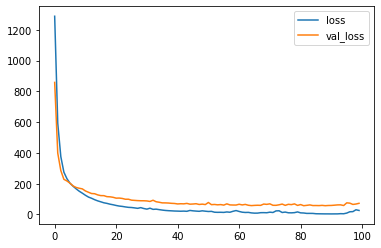

In [54]:
results3 = pd.DataFrame(hist3.history)
results3[['loss', 'val_loss']].plot()

In [58]:
print('RMSE:', np.sqrt(results3.iloc[-1,1]))

RMSE: 8.501761310077763
